# Heart-Disease-Risk-Prediction

## Step 1: Load and Prepare the Dataset

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Heart_Disease_Prediction.csv")
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## Binarize target column:

In [239]:
df['Heart Disease'].unique()
df['Heart Disease'] = df['Heart Disease'].map({
    'Presence': 1,
    'Absence': 0
})
df['Heart Disease'].value_counts()

Heart Disease
0    150
1    120
Name: count, dtype: int64

## EDA:

In [240]:
df.describe()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [241]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [242]:
df.isnull().sum()


Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

The dataset does not contain nulls

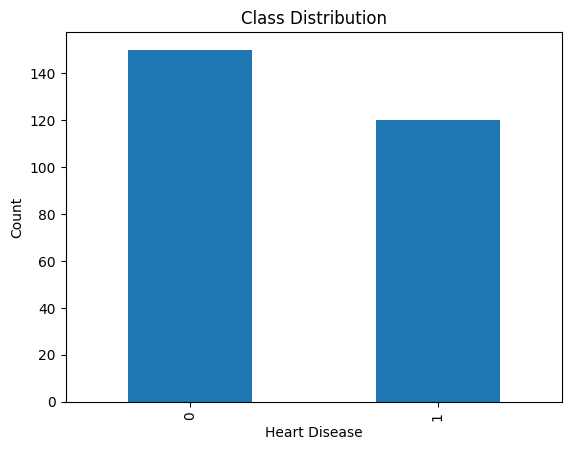

In [243]:
df['Heart Disease'].value_counts()
df['Heart Disease'].value_counts().plot(kind='bar')
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


## Training

In [244]:
features = [
    'Age',
    'Cholesterol',
    'BP',
    'Max HR',
    'ST depression',
    'Number of vessels fluro'
]

X = df[features].values
y = df['Heart Disease'].values.reshape(-1, 1)


In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [246]:
def stratified_train_test_split(X, y, test_size=0.3, seed=42):
    np.random.seed(seed)

    y_flat = y.flatten()

    idx_0 = np.where(y_flat == 0)[0]
    idx_1 = np.where(y_flat == 1)[0]

    np.random.shuffle(idx_0)
    np.random.shuffle(idx_1)

    split_0 = int((1 - test_size) * len(idx_0))
    split_1 = int((1 - test_size) * len(idx_1))

    train_idx = np.concatenate([idx_0[:split_0], idx_1[:split_1]])
    test_idx  = np.concatenate([idx_0[split_0:], idx_1[split_1:]])

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

# Paso 2: Train / Test Split
X_train, X_test, y_train, y_test = stratified_train_test_split(
    X, y, test_size=0.3
)



In [247]:
def normalize(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std, mean, std
X_train, mean, std = normalize(X_train)
X_test = (X_test - mean) / std


## Summary:

The dataset was download from Kaggle, its name is Hearth Disease Prediction Dataset.

This dataset contains 270 records, 14 attributes including physical characteristics and medical information.

### Key Insights
- The average age of patients is approximately 54 years.
- The dataset is relatively balanced, making it suitable for binary classification.
- No missing values were found in the dataset.

### Preprocessing Steps
- The target variable (Heart Disease) was binarized: Presence = 1, Absence = 0.
- Six numerical features were selected: Age, Cholesterol, Blood Pressure, Max Heart Rate, ST Depression, and Number of Vessels.
- The data was split into training and testing sets using a stratified 70/30 split.
- Numerical features were normalized using standardization.

## Step 2: Implement Basic Logistic Regression

### Sigmoid:

In [248]:
def sigmoid(z):
    """Compute the sigmoid of z."""
    return 1 / (1 + np.exp(-z))

### Cost Function:

In [249]:
def compute_cost(w, b, X, y):
    """Compute logistic regression cost J(w, b) using explicit model."""
    m, n = X.shape

    # For each example i: f_{w,b}^{(i)}(x^{(i)}) = sigmoid(w^T x^{(i)} + b)
    z = X @ w + b
    f = sigmoid(z)

    # To avoid log(0), clip probabilities
    eps = 1e-8
    f_clipped = np.clip(f, eps, 1 - eps)

    J = -(1 / m) * np.sum(
        y * np.log(f_clipped) + (1 - y) * np.log(1 - f_clipped)
    )
    return J

### Gradient:

In [250]:
def compute_gradient(w, b, X, y):
    """Compute gradients dJ/dw and dJ/db with explicit model."""
    m, n = X.shape

    # f_{w,b}^{(i)}(x^{(i)})
    z = X @ w + b
    f = sigmoid(z)

    error = f - y  # e^{(i)} = f_{w,b}^{(i)}(x^{(i)}) - y^{(i)}

    dj_dw = (1 / m) * (X.T @ error)
    dj_db = (1 / m) * np.sum(error)

    return dj_dw, dj_db

In [251]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iters, print_every=0):
    """Run gradient descent to optimize w and b."""
    w = w_init.copy()
    b = b_init
    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(w, b, X, y)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J = compute_cost(w, b, X, y)
        J_history.append(J)

        if print_every > 0 and (i % print_every == 0 or i == num_iters - 1):
            print(f"Iteration {i:4d}: J(w, b) = {J:.4f}")

    return w, b, J_history

### Training:

In [252]:
w = np.zeros((X_train.shape[1], 1))
b = 0

alpha = 0.01
iterations = 1500

w, b, costs = gradient_descent(
    X_train, y_train,
    w, b,
    alpha, iterations
)


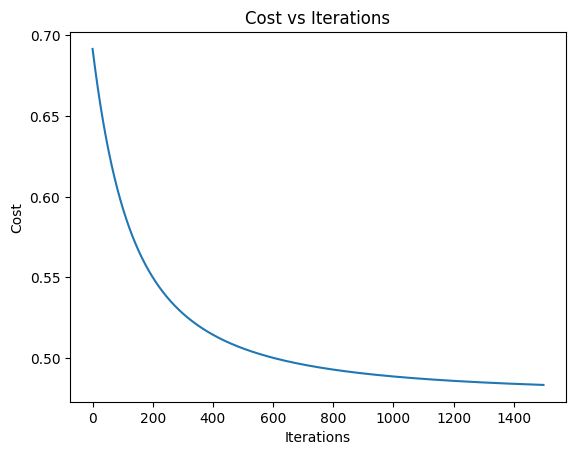

In [253]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()


In [254]:
def predict(X, w, b):
    probs = sigmoid(np.dot(X, w) + b)
    return (probs >= 0.5).astype(int)


In [255]:
y_train_pred = predict(X_train, w, b)
y_test_pred = predict(X_test, w, b)

In [256]:
def classification_metrics(y_true, y_pred):
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP + 1e-8)
    recall = TP / (TP + FN + 1e-8)
    f1 = 2 * precision * recall / (precision + recall + 1e-8)

    return accuracy, precision, recall, f1


In [257]:
train_metrics = classification_metrics(y_train, y_train_pred)
test_metrics = classification_metrics(y_test, y_test_pred)

print("Train Metrics (Acc, Prec, Rec, F1):", train_metrics)
print("Test Metrics  (Acc, Prec, Rec, F1):", test_metrics)


Train Metrics (Acc, Prec, Rec, F1): (np.float64(0.7724867724867724), np.float64(0.7887323942551082), np.float64(0.6666666665873017), np.float64(0.7225806401032259))
Test Metrics  (Acc, Prec, Rec, F1): (np.float64(0.8518518518518519), np.float64(0.8529411762197232), np.float64(0.8055555553317901), np.float64(0.8285714233387756))


##

## Age vs Cholesterol:

In [258]:
features_2 = ['Age', 'Cholesterol']

X_2 = df[features_2].values
y_2 = df['Heart Disease'].values.reshape(-1, 1)

X_train_2, X_test_2, y_train_2, y_test_2 = stratified_train_test_split(
    X_2, y_2, test_size=0.3
)
X_train_2, mean_2, std_2 = normalize(X_train_2)
X_test_2 = (X_test_2 - mean_2) / std_2

w_2 = np.zeros((2, 1))
b_2 = 0

w_2, b_2, costs_2 = gradient_descent(
    X_train_2, y_train_2,
    w_2, b_2,
    alpha=0.01,
    num_iters=1500
)



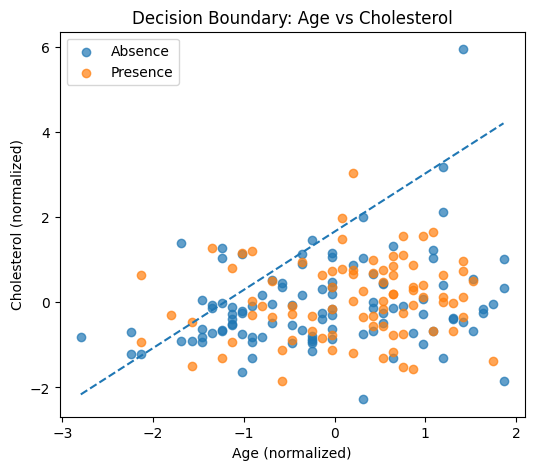

In [259]:
plt.figure(figsize=(6, 5))

# Clase 0
plt.scatter(
    X_train_2[y_train_2.flatten() == 0][:, 0],
    X_train_2[y_train_2.flatten() == 0][:, 1],
    label='Absence',
    alpha=0.7
)

# Clase 1
plt.scatter(
    X_train_2[y_train_2.flatten() == 1][:, 0],
    X_train_2[y_train_2.flatten() == 1][:, 1],
    label='Presence',
    alpha=0.7
)

x_vals_2 = np.linspace(
    X_train_2[:, 0].min(),
    X_train_2[:, 0].max(),
    100
)

y_vals_2 = -(w[0] * x_vals_2 + b) / w[1]

plt.plot(x_vals_2, y_vals_2, linestyle='--')

plt.xlabel('Age (normalized)')
plt.ylabel('Cholesterol (normalized)')
plt.title('Decision Boundary: Age vs Cholesterol')
plt.legend()
plt.show()


## Sex vs EKG results

In [260]:
features_3 = ['BP', 'Max HR']

X_3 = df[features_3].values
y_3 = df['Heart Disease'].values.reshape(-1, 1)

X_train_3, X_test_3, y_train_3, y_test_3 = stratified_train_test_split(
    X_3, y_3, test_size=0.3
)
X_train_3, mean_3, std_3 = normalize(X_train_3)
X_test_3 = (X_test_3 - mean_3) / std_3

w_3 = np.zeros((2, 1))
b_3 = 0

w_3, b_3, costs_3 = gradient_descent(
    X_train_3, y_train_3,
    w_3, b_3,
    alpha=0.01,
    num_iters=1500
)

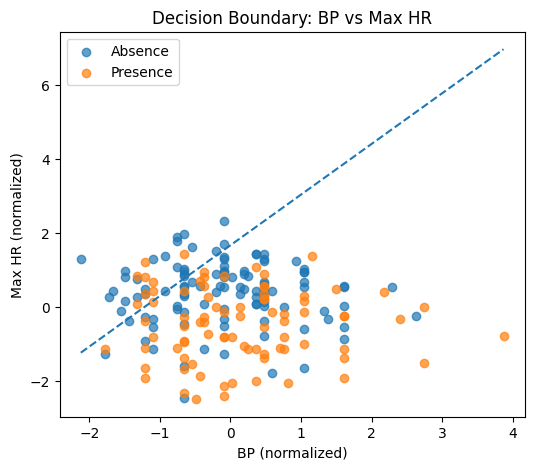

In [261]:
plt.figure(figsize=(6, 5))

# Clase 0
plt.scatter(
    X_train_3[y_train_3.flatten() == 0][:, 0],
    X_train_3[y_train_3.flatten() == 0][:, 1],
    label='Absence',
    alpha=0.7
)

# Clase 1
plt.scatter(
    X_train_3[y_train_3.flatten() == 1][:, 0],
    X_train_3[y_train_3.flatten() == 1][:, 1],
    label='Presence',
    alpha=0.7
)

x_vals_3 = np.linspace(
    X_train_3[:, 0].min(),
    X_train_3[:, 0].max(),
    100
)

y_vals_3 = -(w[0] * x_vals_3 + b) / w[1]

plt.plot(x_vals_3, y_vals_3, linestyle='--')

plt.xlabel('BP (normalized)')
plt.ylabel('Max HR (normalized)')
plt.title('Decision Boundary: BP vs Max HR')
plt.legend()
plt.show()


## ST Depression vs Vessels:

In [262]:
features_4 = ['ST depression', 'Number of vessels fluro']

X_4 = df[features_4].values
y_4 = df['Heart Disease'].values.reshape(-1, 1)

X_train_4, X_test_4, y_train_4, y_test_4 = stratified_train_test_split(
    X_4, y_4, test_size=0.3
)
X_train_4, mean_4, std_4 = normalize(X_train_4)
X_test_4 = (X_test_4 - mean_4) / std_4

w_4 = np.zeros((2, 1))
b_4 = 0

w_4, b_4, costs_4 = gradient_descent(
    X_train_4, y_train_4,
    w_4, b_4,
    alpha=0.01,
    num_iters=1500
)

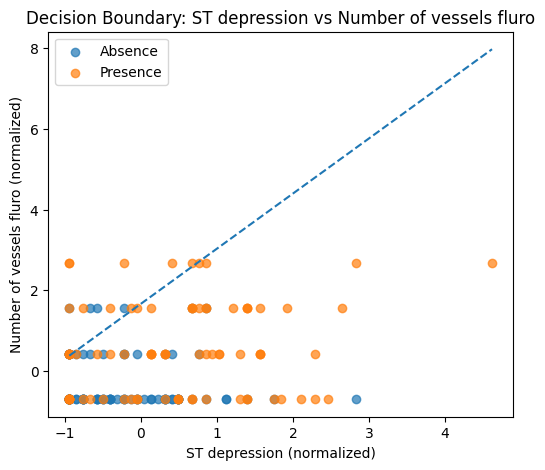

In [263]:
plt.figure(figsize=(6, 5))

# Clase 0
plt.scatter(
    X_train_4[y_train_4.flatten() == 0][:, 0],
    X_train_4[y_train_4.flatten() == 0][:, 1],
    label='Absence',
    alpha=0.7
)

# Clase 1
plt.scatter(
    X_train_4[y_train_4.flatten() == 1][:, 0],
    X_train_4[y_train_4.flatten() == 1][:, 1],
    label='Presence',
    alpha=0.7
)

x_vals_4 = np.linspace(
    X_train_4[:, 0].min(),
    X_train_4[:, 0].max(),
    100
)

y_vals_4 = -(w[0] * x_vals_4 + b) / w[1]

plt.plot(x_vals_4,y_vals_4, linestyle='--')

plt.xlabel('ST depression (normalized)')
plt.ylabel('Number of vessels fluro (normalized)')
plt.title('Decision Boundary: ST depression vs Number of vessels fluro')
plt.legend()
plt.show()
